In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines

In [3]:
import networkx as nx

In [4]:
import folium

In [5]:
# Task
# Map the community structure di MuxViz
# Map the Sankey Diagram to see the evolution of community in each layer - Pake Power BI
# Hitung Spectral Bipartivity each community

In [6]:
# Analysis for report:
# 1. Algorithm for community detection
# 2. Relax rate explanation

In [7]:
# Seaborn heatmap clustering

In [8]:
df_community = pd.read_csv("Community_Detection_12ports_Directed_Weighted_2017.csv", sep=";")

In [9]:
df_community.head()

,Layer,Node,Label,Community
0,1-Multi,1,Aarau,0
1,1-Multi,2,Aken,0
2,1-Multi,3,Alblasserdam,0
3,1-Multi,4,Algeciras,3
4,1-Multi,5,Alphen_aan_den_Rijn,0


In [10]:
# Sea
df_community_layer1 = df_community[df_community['Layer']=="1-Multi"]
# Inland
df_community_layer2 = df_community[df_community['Layer']=="2-Multi"]
# Rail
df_community_layer3 = df_community[df_community['Layer']=="3-Multi"]
# Aggregate
df_community_aggr = df_community[df_community['Layer']=="Aggr"]

In [11]:
# Reset index
df_community_layer1.reset_index(drop=True, inplace=True)
df_community_layer2.reset_index(drop=True, inplace=True)
df_community_layer3.reset_index(drop=True, inplace=True)
df_community_aggr.reset_index(drop=True, inplace=True)

# Table Construction

In [12]:
# Eliminate the unavailable nodes in each layer
# Load the original file
df = pd.read_excel("2017_raw_08062019.xlsx")

df_origin = df[(df['O_City'] == 'Rotterdam') | (df['O_City'] == 'Antwerp') | (df['O_City'] == 'Hamburg')|
              (df['O_City'] == 'Bremerhaven') | (df['O_City'] == 'Valencia') | (df['O_City'] == 'Piraeus')|
              (df['O_City'] == 'Algeciras') | (df['O_City'] == 'Felixstowe') | (df['O_City'] == 'Barcelona')|
              (df['O_City'] == 'Marsaxlokk') | (df['O_City'] == 'Le Havre') | (df['O_City'] == 'Southampton')]

df_destination = df[(df['D_City'] == 'Rotterdam') | (df['D_City'] == 'Antwerp') | (df['D_City'] == 'Hamburg')|
              (df['D_City'] == 'Bremerhaven') | (df['D_City'] == 'Valencia') | (df['D_City'] == 'Piraeus')|
              (df['D_City'] == 'Algeciras') | (df['D_City'] == 'Felixstowe') | (df['D_City'] == 'Barcelona')|
              (df['D_City'] == 'Marsaxlokk') | (df['D_City'] == 'Le Havre') | (df['D_City'] == 'Southampton')]

# merge origin and destination
df_all = pd.concat([df_origin, df_destination])

# reset index
df_all.reset_index(drop=True, inplace=True)

In [13]:
# Group and make a dataframe according to its modality
# Sea
df_sea = df_all[df_all['Transportation mode']=='Sea']

# Inland
df_inland = df_all[df_all['Transportation mode']=='Inland shipping']

# Rail
df_rail = df_all[df_all['Transportation mode']=='Rail']

In [14]:
df_sea.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_inland.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_rail.replace(to_replace = r" ", value = "_", regex=True, inplace=True)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [15]:
# Make list of nodes for each modality
# Sea
sea_origin_list = list(set(df_sea["O_City"]))
sea_destination_list = list(set(df_sea["D_City"]))

# Sorting origin and destination
sea_origin_list.sort()
sea_destination_list.sort()

# Create a full list
sea_full_node = sea_origin_list + sea_destination_list

# Set the full node
sea_full_node = set(sea_full_node)

sea_full_node = list(sea_full_node)
sea_full_node.sort()

In [16]:
len(sea_full_node)

234

In [17]:
# Make list of nodes for each modality
# Sea
inland_origin_list = list(set(df_inland["O_City"]))
inland_destination_list = list(set(df_inland["D_City"]))

# Sorting origin and destination
inland_origin_list.sort()
inland_destination_list.sort()

# Create a full list
inland_full_node = inland_origin_list + inland_destination_list

# Set the full node
inland_full_node = set(inland_full_node)

inland_full_node = list(inland_full_node)
inland_full_node.sort()

In [18]:
len(inland_full_node)

94

In [19]:
# Make list of nodes for each modality
# Sea
rail_origin_list = list(set(df_rail["O_City"]))
rail_destination_list = list(set(df_rail["D_City"]))

# Sorting origin and destination
rail_origin_list.sort()
rail_destination_list.sort()

# Create a full list
rail_full_node = rail_origin_list + rail_destination_list

# Set the full node
rail_full_node = set(rail_full_node)

rail_full_node = list(rail_full_node)
rail_full_node.sort()

In [20]:
len(rail_full_node)

142

In [21]:
# Make dataframe for each modality to contain final results
# Modification will happen on this final dataframe
# Delete some nodes in dataframe if not available in the list

In [22]:
df_community_sea = df_community_layer1.copy()
df_community_inland = df_community_layer2.copy()
df_community_rail = df_community_layer3.copy()

In [23]:
# Check available nodes in sea layer
not_in_sea_df_index = list()
for i in range(len(df_community_sea)):
    if df_community_sea['Label'].values[i] not in sea_full_node:
        not_in_sea_df_index.append(i)
        
df_community_sea.drop(index=not_in_sea_df_index, inplace=True)

In [24]:
len(inland_full_node)

94

In [25]:
# Check available nodes in inland layer
not_in_inland_df_index = list()
for i in range(len(df_community_inland)):
    if df_community_inland['Label'].values[i] not in inland_full_node:
        not_in_inland_df_index.append(i)
        
df_community_inland.drop(index=not_in_inland_df_index, inplace=True)

In [26]:
# Check available nodes in rail layer
not_in_rail_df_index = list()
for i in range(len(df_community_rail)):
    if df_community_rail['Label'].values[i] not in rail_full_node:
        not_in_rail_df_index.append(i)
        
df_community_rail.drop(index=not_in_rail_df_index, inplace=True)

In [27]:
# Reset index
df_community_sea.reset_index(drop=True, inplace=True)
df_community_inland.reset_index(drop=True, inplace=True)
df_community_rail.reset_index(drop=True, inplace=True)

In [28]:
# Visualization using Geovisualization in Python - second priority
# Visualization in Power BI to see the evolution between layers - priority

In [29]:
# Power BI visualization

In [30]:
# Visualize as inland-sea-rail (after clustering)

In [31]:
# Make dataframe source from inland and sea
# Destination to sea and rail
# Final column is count

In [32]:
df_community_sea.head()

,Layer,Node,Label,Community
0,1-Multi,4,Algeciras,3
1,1-Multi,8,Antwerp,1
2,1-Multi,14,Barcelona,3
3,1-Multi,19,Bergen,2
4,1-Multi,24,Bilbao,3


In [33]:
df_community_inland.head()

,Layer,Node,Label,Community
0,2-Multi,2,Aken,2
1,2-Multi,3,Alblasserdam,1
2,2-Multi,5,Alphen_aan_den_Rijn,0
3,2-Multi,6,Amsterdam,1
4,2-Multi,7,Andernach,1


In [34]:
df_community_inland.rename(columns={'Community':"Community-Inland",'Label':'Label-Inland'}, inplace=True)

In [35]:
df_community_sea.rename(columns={'Community':"Community-Sea",'Label':'Label-Sea'}, inplace=True)

In [36]:
df_community_rail.rename(columns={'Community':"Community-Rail",'Label':'Label-Rail'}, inplace=True)

In [37]:
test_df = pd.merge(df_community_inland, df_community_sea, how='outer', on='Node')

In [38]:
test_final = pd.merge(test_df, df_community_rail, how='outer', on='Node')

In [39]:
test_final.groupby(by=['Community-Inland','Community-Sea']).count()

Layer_x  Node  Label-Inland  Layer_y  \
Community-Inland Community-Sea                                         
0.0              0.0                  1     1             1        1   
                 1.0                  1     1             1        1   
1.0              1.0                  6     6             6        6   
2.0              2.0                  1     1             1        1   

                                Label-Sea  Layer  Label-Rail  Community-Rail  
Community-Inland Community-Sea                                                
0.0              0.0                    1      1           1               1  
                 1.0                    1      0           0               0  
1.0              1.0                    6      3           3               3  
2.0              2.0                    1      1           1               1

In [40]:
# make dataframe
df_community_inland_sea = test_final.groupby(by=['Community-Inland','Community-Sea']).count()

In [41]:
df_community_inland_sea.drop(labels=['Layer_x','Label-Inland','Layer_y','Label-Sea','Layer','Label-Rail','Community-Rail'], axis=1, inplace=True)

In [42]:
df_community_inland_sea.index

MultiIndex(levels=[[0.0, 1.0, 2.0], [0.0, 1.0, 2.0, 3.0, 4.0]],
           codes=[[0, 0, 1, 2], [0, 1, 1, 2]],
           names=['Community-Inland', 'Community-Sea'])

In [43]:
df_community_inland_sea.index.names

FrozenList(['Community-Inland', 'Community-Sea'])

In [44]:
l_inland_sea_source = list()
l_inland_sea_destination = list()

In [45]:
dict_index_inland_sea = {df_community_inland_sea.index.names[i]:list(df_community_inland_sea.index.codes[i]) for i in range(len(df_community_inland_sea.index.names))}

In [46]:
dict_index_inland_sea

{'Community-Inland': [0, 0, 1, 2], 'Community-Sea': [0, 1, 1, 2]}

In [47]:
trace = 0
for i,j in dict_index_inland_sea.items():
    for k in range(len(j)):
        name = i + '-' + str(j[k])
        if trace < (len(dict_index_inland_sea)/2):
            l_inland_sea_source.append(name)
        else:
            l_inland_sea_destination.append(name)
    
    trace+=1

In [48]:
l_count_inland_sea  = list(df_community_inland_sea['Node'].values)

In [49]:
test_final.groupby(by=['Community-Sea','Community-Rail']).count()

Layer_x  Node  Label-Inland  Community-Inland  \
Community-Sea Community-Rail                                                  
0.0           0.0                   1     2             1                 1   
              1.0                   0     1             0                 0   
1.0           1.0                   3     4             3                 3   
              4.0                   0     2             0                 0   
2.0           1.0                   0     1             0                 0   
              2.0                   1     5             1                 1   
3.0           1.0                   0     2             0                 0   
              3.0                   0     5             0                 0   
4.0           4.0                   0     4             0                 0   

                              Layer_y  Label-Sea  Layer  Label-Rail  
Community-Sea Community-Rail                                         
0.0           0.0                   2          2      2           2  
              1.0                   1          1      1           1  
1.0           1.0                   4          4      4           4  
              4.0                   2          2      2           2  
2.0           1.0                   1          1      1           1  
              2.0                   5          5      5           5  
3.0           1.0                   2          2      2           2  
              3.0                   5          5      5           5  
4.0           4.0                   4          4      4           4

In [50]:
# make dataframe
df_community_sea_rail = test_final.groupby(by=['Community-Sea','Community-Rail']).count()

df_community_sea_rail.drop(labels=['Layer_x','Label-Inland','Layer_y','Label-Sea','Layer','Label-Rail','Community-Inland'], axis=1, inplace=True)

l_sea_rail_source = list()
l_sea_rail_destination = list()

dict_index_sea_rail = {df_community_sea_rail.index.names[i]:list(df_community_sea_rail.index.codes[i]) for i in range(len(df_community_sea_rail.index.names))}

trace = 0
for i,j in dict_index_sea_rail.items():
    for k in range(len(j)):
        name = i + '-' + str(j[k])
        if trace < (len(dict_index_sea_rail)/2):
            l_sea_rail_source.append(name)
        else:
            l_sea_rail_destination.append(name)
    
    trace+=1

In [51]:
l_count_sea_rail  = list(df_community_sea_rail['Node'].values)

In [52]:
test_final.groupby(by=['Community-Inland','Community-Rail']).count()

Layer_x  Node  Label-Inland  Layer_y  \
Community-Inland Community-Rail                                         
0.0              0.0                   4     4             4        1   
                 1.0                   1     1             1        0   
1.0              1.0                  23    23            23        3   
2.0              2.0                   3     3             3        1   

                                 Label-Sea  Community-Sea  Layer  Label-Rail  
Community-Inland Community-Rail                                               
0.0              0.0                     1              1      4           4  
                 1.0                     0              0      1           1  
1.0              1.0                     3              3     23          23  
2.0              2.0                     1              1      3           3

In [53]:
# make dataframe
df_community_inland_rail = test_final.groupby(by=['Community-Inland','Community-Rail']).count()

df_community_inland_rail.drop(labels=['Layer_x','Label-Inland','Layer_y','Label-Sea','Layer','Label-Rail','Community-Sea'], axis=1, inplace=True)

l_inland_rail_source = list()
l_inland_rail_destination = list()

dict_index_inland_rail = {df_community_inland_rail.index.names[i]:list(df_community_inland_rail.index.codes[i]) for i in range(len(df_community_inland_rail.index.names))}

trace = 0
for i,j in dict_index_inland_rail.items():
    for k in range(len(j)):
        name = i + '-' + str(j[k])
        if trace < (len(dict_index_inland_rail)/2):
            l_inland_rail_source.append(name)
        else:
            l_inland_rail_destination.append(name)
    
    trace+=1

In [54]:
l_count_inland_rail  = list(df_community_inland_rail['Node'].values)

In [55]:
# Make the final dataframe for Power BI

In [56]:
len_total = len(l_count_inland_rail) + len(l_count_inland_sea) + len(l_count_sea_rail)

In [57]:
df_powerbi_inland_rail = pd.DataFrame(index=range(len(l_count_inland_rail)), columns=['Source','Destination','Count'])
df_powerbi_inland_sea = pd.DataFrame(index=range(len(l_count_inland_sea)), columns=['Source','Destination','Count'])
df_powerbi_sea_rail = pd.DataFrame(index=range(len(l_count_sea_rail)), columns=['Source','Destination','Count'])

In [58]:
trace = 0

# Input inland to rail data
for i in range(len(l_count_inland_rail)):
    df_powerbi_inland_rail.loc[i,"Count"] = l_count_inland_rail[i]
    df_powerbi_inland_rail.loc[i,"Source"] = l_inland_rail_source[i]
    df_powerbi_inland_rail.loc[i,"Destination"] = l_inland_rail_destination[i]

# Input inland to sea data
for i in range(len(l_count_inland_sea)):
    df_powerbi_inland_sea.loc[i,"Count"] = l_count_inland_sea[i]
    df_powerbi_inland_sea.loc[i,"Source"] = l_inland_sea_source[i]
    df_powerbi_inland_sea.loc[i,"Destination"] = l_inland_sea_destination[i]

# Input sea to rail data
for i in range(len(l_count_sea_rail)):
    df_powerbi_sea_rail.loc[i,"Count"] = l_count_sea_rail[i]
    df_powerbi_sea_rail.loc[i,"Source"] = l_sea_rail_source[i]
    df_powerbi_sea_rail.loc[i,"Destination"] = l_sea_rail_destination[i]

In [59]:
df_powerbi = pd.concat([df_powerbi_inland_rail, df_powerbi_inland_sea, df_powerbi_sea_rail])

In [60]:
df_powerbi.reset_index(drop=True, inplace=True)

In [61]:
df_powerbi.to_excel("powerbi_2017.xlsx")

In [62]:
# Visualization

In [63]:
# Inland
# Sea
# Rail

In [64]:
# List down all nodes by layers
# Add coordinates
# Visualize in Python with different colour per community ID
# Columns: Nodes, coordinates, community ID

In [65]:
df_loc_coordinates = pd.read_csv("terminal_loc_layout_2017.txt", sep=" ")

In [66]:
df_loc_coordinates.rename(columns={'nodeID':'Node'}, inplace=True)

In [67]:
df_loc_community_sea = pd.merge(df_community_sea, df_loc_coordinates, how='inner', on='Node')

In [68]:
len(df_loc_coordinates)

250

In [69]:
df_loc_community_sea.drop(labels=['nodeLabel'], axis=1, inplace=True)

In [70]:
colour_map = {0:'Red', 1:'Green', 2:'Blue', 3:'Orange', 4:'Purple'}

In [71]:
for i in range(len(df_loc_community_sea)):
    df_loc_community_sea.loc[i,'Colour'] = colour_map[df_loc_community_sea.loc[i,'Community-Sea']]

In [72]:
len(df_community_inland)

94

In [73]:
# Make an empty map
m = folium.Map(location=[20,0],tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df_loc_community_sea)):
    folium.Circle(
      location=[df_loc_community_sea.iloc[i]['nodeLat'], df_loc_community_sea.iloc[i]['nodeLong']],
      popup=df_loc_community_sea.iloc[i]['Label-Sea'],
      radius=10000,
      color = df_loc_community_sea.loc[i,'Colour'],
      fill=True,
      fill_color=df_loc_community_sea.loc[i,'Colour']
   ).add_to(m)

In [74]:
m

In [75]:
df_loc_community_inland = pd.merge(df_community_inland, df_loc_coordinates, how='inner', on='Node')
df_loc_community_inland.drop(labels=['nodeLabel'], axis=1, inplace=True)

for i in range(len(df_loc_community_inland)):
    df_loc_community_inland.loc[i,'Colour'] = colour_map[df_loc_community_inland.loc[i,'Community-Inland']]

In [76]:
# Make an empty map
m_inland = folium.Map(location=[20,0],tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df_loc_community_inland)):
    folium.Circle(
      location=[df_loc_community_inland.iloc[i]['nodeLat'], df_loc_community_inland.iloc[i]['nodeLong']],
      popup=df_loc_community_inland.iloc[i]['Label-Inland'],
      radius=8000,
      color = df_loc_community_inland.loc[i,'Colour'],
      fill=True,
      fill_color=df_loc_community_inland.loc[i,'Colour']
   ).add_to(m_inland)

In [77]:
m_inland

In [78]:
df_loc_community_rail = pd.merge(df_community_rail, df_loc_coordinates, how='inner', on='Node')
df_loc_community_rail.drop(labels=['nodeLabel'], axis=1, inplace=True)

for i in range(len(df_loc_community_rail)):
    df_loc_community_rail.loc[i,'Colour'] = colour_map[df_loc_community_rail.loc[i,'Community-Rail']]
    
# Make an empty map
m_rail = folium.Map(location=[20,0],tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df_loc_community_rail)):
    folium.Circle(
      location=[df_loc_community_rail.iloc[i]['nodeLat'], df_loc_community_rail.iloc[i]['nodeLong']],
      popup=df_loc_community_rail.iloc[i]['Label-Rail'],
      radius=8000,
      color = df_loc_community_rail.loc[i,'Colour'],
      fill=True,
      fill_color=df_loc_community_rail.loc[i,'Colour']
   ).add_to(m_rail)
    
m_rail

In [79]:
# Spectral bipartivity per community per layer

In [80]:
# Spectral bipartivity for sea

In [81]:
df_community_sea.head()

,Layer,Node,Label-Sea,Community-Sea
0,1-Multi,4,Algeciras,3
1,1-Multi,8,Antwerp,1
2,1-Multi,14,Barcelona,3
3,1-Multi,19,Bergen,2
4,1-Multi,24,Bilbao,3


# Spectral Bipartivity

In [82]:
# Spectral bipartivity for sea

In [83]:
df_community_sea.head()

,Layer,Node,Label-Sea,Community-Sea
0,1-Multi,4,Algeciras,3
1,1-Multi,8,Antwerp,1
2,1-Multi,14,Barcelona,3
3,1-Multi,19,Bergen,2
4,1-Multi,24,Bilbao,3


In [84]:
df_sea.head()

,O_Country_ID,O_Country,O_City,O_Terminal,D_Country_ID,D_Country,D_City,D_Terminal,Carrier_ID,Carrier,...,Thursday,Friday,Saturday,Sunday,Number of departures per week,Transport time (days),O_City_Longitude,O_City_Latitude,D_City_Longitude,D_City_Latitude
385,DE119,Germany,Bremerhaven,Terminal_not_specified,DE135,Germany,Hamburg,Terminal_not_specified,P180,North_Sea_Container_Line,...,0,0,0,0,1,6,8.586551,53.552226,10.000654,53.550341
386,DE119,Germany,Bremerhaven,Terminal_not_specified,NO002,Norway,Bergen,Bergen,P180,North_Sea_Container_Line,...,0,0,0,0,1,2,8.586551,53.552226,5.325812,60.394303
387,DE119,Germany,Bremerhaven,Terminal_not_specified,NO020,Norway,Tananger,Risavika_Havn,P180,North_Sea_Container_Line,...,0,0,0,0,1,1,8.586551,53.552226,NaN,NaN
388,DE119,Germany,Bremerhaven,Terminal_not_specified,NO021,Norway,Alesund,Skutvika,P180,North_Sea_Container_Line,...,0,0,0,0,1,3,8.586551,53.552226,NaN,NaN
389,DE119,Germany,Bremerhaven,Terminal_not_specified,NO025,Norway,Haugesund,Haugesund_(Husoy),P180,North_Sea_Container_Line,...,0,0,0,0,1,1,8.586551,53.552226,NaN,NaN


In [85]:
# Delete the path if both origin and destination are not included in df_community_sea

In [86]:
# Make new dataframe for spectral bipartivity analysis
df_spectral_sea = df_sea.copy()
df_spectral_sea.reset_index(drop=True, inplace=True)

In [87]:
# Make a new list of sea community
l_spectral_sea_community = list(set(df_community_sea['Label-Sea'].values))

In [88]:
# Check which part of path not in the community of interest
spectral_not_in_sea_community = list()

for i in range(len(df_spectral_sea)):
    spectral_sea_origin = df_spectral_sea.loc[i,'O_City']
    spectral_sea_destination = df_spectral_sea.loc[i,'D_City']
    
    if spectral_sea_origin not in l_spectral_sea_community:
        spectral_not_in_sea_community.append(i)
    
    if spectral_sea_destination not in l_spectral_sea_community:
        spectral_not_in_sea_community.append(i)
        
#    if spectral_sea_origin not in l_spectral_sea_community:
#        if spectral_sea_destination not in l_spectral_sea_community:
#            spectral_not_in_sea_community.append(i)

In [89]:
df_spectral_sea.drop(index=spectral_not_in_sea_community, inplace=True)
df_spectral_sea.reset_index(drop=False, inplace=True)

In [90]:
# Make dictionary for mapping city and community ID
dict_spectral_sea = {df_community_sea.loc[i,'Label-Sea']:df_community_sea.loc[i,'Community-Sea'] for i in range(len(df_community_sea))}

In [91]:
for i in range(len(df_spectral_sea)):
    spectral_sea_origin = df_spectral_sea.loc[i,'O_City']
    spectral_sea_destination = df_spectral_sea.loc[i,'D_City']
    
    if spectral_sea_origin not in l_spectral_sea_community:
        df_spectral_sea.loc[i,'Community_ID'] = dict_spectral_sea[spectral_sea_destination]
    else:
        df_spectral_sea.loc[i,'Community_ID'] = dict_spectral_sea[spectral_sea_origin]

In [92]:
# check the value of sea community
set(df_spectral_sea['Community_ID'].values)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [93]:
# Group the sea community by ID
df_spectral_sea_comm_0 = df_spectral_sea[df_spectral_sea['Community_ID'] == 0]
df_spectral_sea_comm_1 = df_spectral_sea[df_spectral_sea['Community_ID'] == 1]
df_spectral_sea_comm_2 = df_spectral_sea[df_spectral_sea['Community_ID'] == 2]
df_spectral_sea_comm_3 = df_spectral_sea[df_spectral_sea['Community_ID'] == 3]
df_spectral_sea_comm_4 = df_spectral_sea[df_spectral_sea['Community_ID'] == 4]

In [94]:
# Reset index for each sea community dataframe
df_spectral_sea_comm_0.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_1.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_2.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_3.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_4.reset_index(drop=True, inplace=True)

In [95]:
# Make the sea community graph before calculating spectral value

In [96]:
G_spectral_sea_comm_0 = nx.from_pandas_edgelist(df_spectral_sea_comm_0, source='O_City', target='D_City')
G_spectral_sea_comm_1 = nx.from_pandas_edgelist(df_spectral_sea_comm_1, source='O_City', target='D_City')
G_spectral_sea_comm_2 = nx.from_pandas_edgelist(df_spectral_sea_comm_2, source='O_City', target='D_City')
G_spectral_sea_comm_3 = nx.from_pandas_edgelist(df_spectral_sea_comm_3, source='O_City', target='D_City')
G_spectral_sea_comm_4 = nx.from_pandas_edgelist(df_spectral_sea_comm_4, source='O_City', target='D_City')

In [97]:
spectral_value_sea_comm_0 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_0)
spectral_value_sea_comm_1 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_1)
spectral_value_sea_comm_2 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_2)
spectral_value_sea_comm_3 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_3)
spectral_value_sea_comm_4 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_4)

In [98]:
l_spectral_value_sea = [spectral_value_sea_comm_0,spectral_value_sea_comm_1,spectral_value_sea_comm_2,spectral_value_sea_comm_3,spectral_value_sea_comm_4]

In [99]:
# Batasan

In [100]:
# Spectra bipartivity for inland

In [101]:
# Make new dataframe for spectral bipartivity analysis
df_spectral_inland = df_inland.copy()
df_spectral_inland.reset_index(drop=True, inplace=True)

# Make a new list of sea community
l_spectral_inland_community = list(set(df_community_inland['Label-Inland'].values))

# Check which part of path not in the community of interest
spectral_not_in_inland_community = list()

for i in range(len(df_spectral_inland)):
    spectral_inland_origin = df_spectral_inland.loc[i,'O_City']
    spectral_inland_destination = df_spectral_inland.loc[i,'D_City']
        
    if spectral_inland_origin not in l_spectral_inland_community:
        spectral_not_in_inland_community.append(i)
    
    if spectral_inland_destination not in l_spectral_inland_community:
        spectral_not_in_inland_community.append(i)

# Drop the unused path and reset the index
df_spectral_inland.drop(index=spectral_not_in_inland_community, inplace=True)
df_spectral_inland.reset_index(drop=False, inplace=True)

# Make dictionary for mapping city and community ID
dict_spectral_inland = {df_community_inland.loc[i,'Label-Inland']:df_community_inland.loc[i,'Community-Inland'] for i in range(len(df_community_inland))}

for i in range(len(df_spectral_inland)):
    spectral_inland_origin = df_spectral_inland.loc[i,'O_City']
    spectral_inland_destination = df_spectral_inland.loc[i,'D_City']
    
    if spectral_inland_origin not in l_spectral_inland_community:
        df_spectral_inland.loc[i,'Community_ID'] = dict_spectral_inland[spectral_inland_destination]
    else:
        df_spectral_inland.loc[i,'Community_ID'] = dict_spectral_inland[spectral_inland_origin]

In [102]:
# check the value of sea community
set(df_spectral_inland['Community_ID'].values)

{0.0, 1.0, 2.0}

In [103]:
# Group the sea community by ID
df_spectral_inland_comm_0 = df_spectral_inland[df_spectral_inland['Community_ID'] == 0]
df_spectral_inland_comm_1 = df_spectral_inland[df_spectral_inland['Community_ID'] == 1]
df_spectral_inland_comm_2 = df_spectral_inland[df_spectral_inland['Community_ID'] == 2]

# Reset index for each sea community dataframe
df_spectral_inland_comm_0.reset_index(drop=True, inplace=True)
df_spectral_inland_comm_1.reset_index(drop=True, inplace=True)
df_spectral_inland_comm_2.reset_index(drop=True, inplace=True)

# Make the sea community graph before calculating spectral value
G_spectral_inland_comm_0 = nx.from_pandas_edgelist(df_spectral_inland_comm_0, source='O_City', target='D_City')
G_spectral_inland_comm_1 = nx.from_pandas_edgelist(df_spectral_inland_comm_1, source='O_City', target='D_City')
G_spectral_inland_comm_2 = nx.from_pandas_edgelist(df_spectral_inland_comm_2, source='O_City', target='D_City')

spectral_value_inland_comm_0 = nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_0)
spectral_value_inland_comm_1 = nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_1)
spectral_value_inland_comm_2 = nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_2)

In [104]:
l_spectral_value_inland = [spectral_value_inland_comm_0,spectral_value_inland_comm_1,spectral_value_inland_comm_2]

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


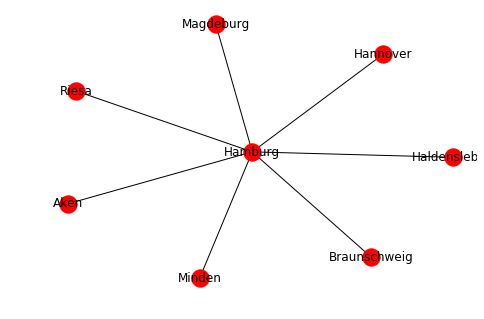

In [105]:
nx.draw(G_spectral_inland_comm_2, with_labels=True)

In [106]:
# IDE and INSIGHT: cari the most critical nodes by spectral bipartivity node. The node like Hamburg and above example
# will extremely prone to attack and lose the connection for the rest of cities for this type of modality.
# Check same node in other mode of transportation

In [107]:
# Spectral bipartivity for rail

In [108]:
# Make new dataframe for spectral bipartivity analysis
df_spectral_rail = df_rail.copy()
df_spectral_rail.reset_index(drop=True, inplace=True)

# Make a new list of sea community
l_spectral_rail_community = list(set(df_community_rail['Label-Rail'].values))

# Check which part of path not in the community of interest
spectral_not_in_rail_community = list()

for i in range(len(df_spectral_rail)):
    spectral_rail_origin = df_spectral_rail.loc[i,'O_City']
    spectral_rail_destination = df_spectral_rail.loc[i,'D_City']
        
    if spectral_rail_origin not in l_spectral_rail_community:
        spectral_not_in_rail_community.append(i)
    
    if spectral_rail_destination not in l_spectral_rail_community:
        spectral_not_in_rail_community.append(i)

# Drop the unused path and reset the index
df_spectral_rail.drop(index=spectral_not_in_rail_community, inplace=True)
df_spectral_rail.reset_index(drop=False, inplace=True)

# Make dictionary for mapping city and community ID
dict_spectral_rail = {df_community_rail.loc[i,'Label-Rail']:df_community_rail.loc[i,'Community-Rail'] for i in range(len(df_community_rail))}

for i in range(len(df_spectral_rail)):
    spectral_rail_origin = df_spectral_rail.loc[i,'O_City']
    spectral_rail_destination = df_spectral_rail.loc[i,'D_City']
    
    if spectral_rail_origin not in l_spectral_rail_community:
        df_spectral_rail.loc[i,'Community_ID'] = dict_spectral_rail[spectral_rail_destination]
    else:
        df_spectral_rail.loc[i,'Community_ID'] = dict_spectral_rail[spectral_rail_origin]

In [109]:
# check the value of sea community
set(df_spectral_rail['Community_ID'].values)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [110]:
# Group the sea community by ID
df_spectral_rail_comm_0 = df_spectral_rail[df_spectral_rail['Community_ID'] == 0]
df_spectral_rail_comm_1 = df_spectral_rail[df_spectral_rail['Community_ID'] == 1]
df_spectral_rail_comm_2 = df_spectral_rail[df_spectral_rail['Community_ID'] == 2]
df_spectral_rail_comm_3 = df_spectral_rail[df_spectral_rail['Community_ID'] == 3]
df_spectral_rail_comm_4 = df_spectral_rail[df_spectral_rail['Community_ID'] == 4]

# Reset index for each sea community dataframe
df_spectral_rail_comm_0.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_1.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_2.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_3.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_4.reset_index(drop=True, inplace=True)

# Make the sea community graph before calculating spectral value
G_spectral_rail_comm_0 = nx.from_pandas_edgelist(df_spectral_rail_comm_0, source='O_City', target='D_City')
G_spectral_rail_comm_1 = nx.from_pandas_edgelist(df_spectral_rail_comm_1, source='O_City', target='D_City')
G_spectral_rail_comm_2 = nx.from_pandas_edgelist(df_spectral_rail_comm_2, source='O_City', target='D_City')
G_spectral_rail_comm_3 = nx.from_pandas_edgelist(df_spectral_rail_comm_3, source='O_City', target='D_City')
G_spectral_rail_comm_4 = nx.from_pandas_edgelist(df_spectral_rail_comm_4, source='O_City', target='D_City')

spectral_value_rail_comm_0 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_0)
spectral_value_rail_comm_1 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_1)
spectral_value_rail_comm_2 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_2)
spectral_value_rail_comm_3 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_3)
spectral_value_rail_comm_4 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_4)

In [111]:
l_spectral_value_rail = [spectral_value_rail_comm_0,spectral_value_rail_comm_1,spectral_value_rail_comm_2,spectral_value_rail_comm_3,\
                        spectral_value_rail_comm_4]

In [112]:
spectral_value_rail_comm_1

0.6304463644270935

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


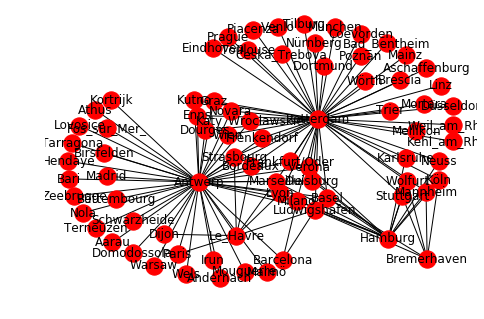

In [113]:
nx.draw_kamada_kawai(G_spectral_rail_comm_1, with_labels=True)

In [114]:
# IDE and TO DO: calculate the spectral bipartivity for 12 hubs in each mode and then list down in a table
# Make a table for the general spectral bipartivity. Columns: spectral bipartivity value for each mode. Index: Community ID
# Columns: spectral value for each mode for each hub. Put attention for the community ID in case the community was changed.
# Index: the hubs
# Intention to know the efficiency of the port - if this goes down or disrupted, how many redundant links available?
# Lower is better
# Find attractor or driver in each layer, which layer is the driver? 

In [115]:
# Put the spectral bipartivity results in the dataframe

In [116]:
df_spectral_total_value = pd.DataFrame(index=['Community-0','Community-1', 'Community-2','Community-3','Community-4'], columns=['Inland','Sea','Rail'])

In [117]:
index_inland = len(l_spectral_value_inland)
df_spectral_total_value['Inland'][:index_inland] = l_spectral_value_inland

In [118]:
index_sea = len(l_spectral_value_sea)
df_spectral_total_value['Sea'][:index_sea] = l_spectral_value_sea

In [119]:
index_rail = len(l_spectral_value_rail)
df_spectral_total_value['Rail'][:index_rail] = l_spectral_value_rail

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
df_spectral_total_value_2 = np.float64(df_spectral_total_value)

In [121]:
df_spectral_total_value_3 = pd.DataFrame(df_spectral_total_value_2, index=['Community-0','Community-1', 'Community-2','Community-3','Community-4'], columns=['Inland','Sea','Rail'])

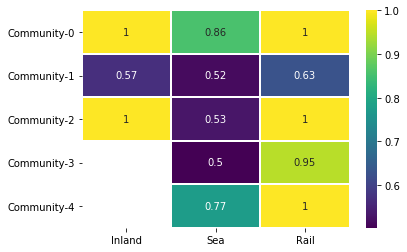

In [122]:
sns.heatmap(df_spectral_total_value_3, cmap='viridis', linewidths=1, annot=True)

In [123]:
hubs = ['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Southampton']

In [124]:
# Make a multiindex for each levels
community_index = [0,1,2,0,1,2,3,4,0,1,2,3,4]
mode_index = ['Inland','Inland','Inland','Sea','Sea','Sea','Sea','Sea','Rail','Rail','Rail','Rail','Rail']
multi_index = list(zip(mode_index,community_index))
hub_index = pd.MultiIndex.from_tuples(multi_index)

In [125]:
#df_spectral_hub_value = pd.DataFrame(index=hub_index, columns=hubs)

In [126]:
# find spectral value for each hub and in each community

In [127]:
nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_0, ['Rotterdam'])

{'Rotterdam': 1.0}

In [128]:
data = list()
for ports in hubs:
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_0, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_1, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_2, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_0, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_1, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_2, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_3, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_4, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_0, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_1, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_2, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_3, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_4, [ports])[ports])
    except:
        data.append(0)

In [129]:
new_data = list()
first_index = 0
last_index = 0

for i in range(len(hubs)):
    last_index = first_index + 13
    new_data.append(list(data[first_index:last_index]))
    first_index = last_index

In [130]:
dict_spectral_total = dict()
for i in range(len(hubs)):
    dict_spectral_total[hubs[i]] = new_data[i]

In [131]:
df_spectral_hub_value = pd.DataFrame(dict_spectral_total, index=hub_index)

In [132]:
df_spectral_hub_value

Rotterdam   Antwerp   Hamburg  Bremerhaven  Valencia   Piraeus  \
Inland 0   1.000000  1.000000  0.000000     0.000000  0.000000  0.000000   
       1   0.559722  0.554202  0.000000     0.000000  0.000000  0.000000   
       2   0.000000  0.000000  1.000000     0.000000  0.000000  0.000000   
Sea    0   0.940321  0.796033  0.934224     0.000000  0.790798  0.997948   
       1   0.514940  0.517560  0.509184     0.512700  0.513535  0.516608   
       2   0.511073  0.531866  0.524832     0.518833  0.552844  0.552844   
       3   0.502435  0.501734  0.502800     0.502895  0.501063  0.502739   
       4   0.741944  0.713995  0.778046     0.967077  0.778046  0.741944   
Rail   0   1.000000  1.000000  1.000000     1.000000  1.000000  0.000000   
       1   0.669238  0.552084  0.742589     0.795939  0.000000  0.000000   
       2   1.000000  1.000000  1.000000     1.000000  0.000000  0.000000   
       3   0.000000  0.794464  0.000000     0.000000  0.980591  0.000000   
       4   0.000000  0.000000  0.000000     0.000000  0.000000  0.000000   

          Algeciras  Felixstowe  Barcelona  Marsaxlokk  Le_Havre  Southampton  
Inland 0   0.000000    0.000000   0.000000    0.000000  1.000000     0.000000  
       1   0.000000    0.000000   0.000000    0.000000  0.000000     0.000000  
       2   0.000000    0.000000   0.000000    0.000000  0.000000     0.000000  
Sea    0   0.790798    0.940321   0.790798    0.940321  0.858140     0.771599  
       1   0.506909    0.506814   0.517857    0.523927  0.508173     0.509282  
       2   0.552844    0.509111   0.000000    0.552844  0.575317     0.575317  
       3   0.502983    0.502575   0.500919    0.500640  0.501637     0.502172  
       4   0.878536    0.903231   0.716028    0.967077  0.713995     0.654051  
Rail   0   0.000000    1.000000   1.000000    0.000000  1.000000     0.000000  
       1   0.000000    0.000000   0.529932    0.000000  0.535635     0.000000  
       2   0.000000    0.000000   0.000000    0.000000  1.000000     0.000000  
       3   0.000000    0.000000   0.933112    0.000000  0.000000     0.000000  
       4   0.000000    1.000000   0.000000    0.000000  0.000000     1.000000

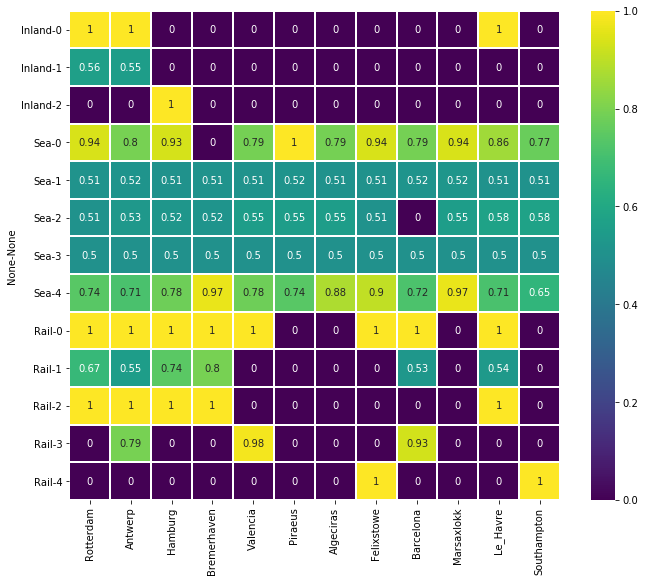

In [133]:
f,ax = plt.subplots(figsize=(11,9), nrows=1, ncols=1)
sns.heatmap(df_spectral_hub_value, cmap='viridis', linewidths=1, annot=True, ax=ax)

In [134]:
# Why same ports could be in 2 communities? - because of the destination is the port in other community\
# no ports can have a standalone. It must be connected somewhere

In [135]:
# TO DO - suggestion for next research
# Spectral bipartivity for aggregate network - aggregate maksudnya combine seluruh modality di satu layer
# Column is hubs. Index is community index. Present heatmap the value of spectral bipartivity of the hubs.
# Pikir dl dan kalau keburu bikin

In [136]:
# TO DO - buat next research
# Pake dan check community structure aggregate network di R dan jalanin step by step kyk tadi
# Community ada 23 lebih di aggregate network dan petain kyk langkah-langkah diatas.

In [137]:
# TO DO - For next research
# community detection by weighted links.

In [138]:
df_spectral = df_all.copy()
df_spectral.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_spectral.reset_index(drop=True, inplace=True)

In [139]:
# Separate by community ID


In [140]:
# Batasan

In [141]:
# random walker didn't really cover all sample points.
# Hence, some nodes are missing in the community.

In [142]:
# 4 Combination of visualization for the interchange based on hierarchical subgraphs (inland and sea should come together)

In [143]:
# Inland-Sea-Rail - Priority analysis after clustering
# Sea-Inland-Rail
# Rail-Sea_inland
# Rail-Inland-Sea

In [144]:
# Batasan

In [145]:
df_spectral_sea_networkx_0 = df_spectral_sea_comm_0.copy()
df_spectral_sea_networkx_1 = df_spectral_sea_comm_1.copy()
df_spectral_sea_networkx_2 = df_spectral_sea_comm_2.copy()
df_spectral_sea_networkx_3 = df_spectral_sea_comm_3.copy()
df_spectral_sea_networkx_4 = df_spectral_sea_comm_4.copy()

In [146]:
df_spectral_inland_networkx_0 = df_spectral_inland_comm_0.copy()
df_spectral_inland_networkx_1 = df_spectral_inland_comm_1.copy()
df_spectral_inland_networkx_2 = df_spectral_inland_comm_2.copy()

In [147]:
df_spectral_rail_networkx_0 = df_spectral_rail_comm_0.copy()
df_spectral_rail_networkx_1 = df_spectral_rail_comm_1.copy()
df_spectral_rail_networkx_2 = df_spectral_rail_comm_2.copy()
df_spectral_rail_networkx_3 = df_spectral_rail_comm_3.copy()
df_spectral_rail_networkx_4 = df_spectral_rail_comm_4.copy()

In [148]:
# Eliminate NaN so it can be plotted on the map

In [149]:
df_spectral_sea_networkx_0.dropna(inplace=True)
df_spectral_sea_networkx_1.dropna(inplace=True)
df_spectral_sea_networkx_2.dropna(inplace=True)
df_spectral_sea_networkx_3.dropna(inplace=True)
df_spectral_sea_networkx_4.dropna(inplace=True)

df_spectral_sea_networkx_0.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_1.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_2.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_3.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_4.reset_index(drop=True, inplace=True)

In [150]:
df_spectral_inland_networkx_0.dropna(inplace=True)
df_spectral_inland_networkx_1.dropna(inplace=True)
df_spectral_inland_networkx_2.dropna(inplace=True)

df_spectral_inland_networkx_0.reset_index(drop=True, inplace=True)
df_spectral_inland_networkx_1.reset_index(drop=True, inplace=True)
df_spectral_inland_networkx_2.reset_index(drop=True, inplace=True)

In [151]:
df_spectral_rail_networkx_0.dropna(inplace=True)
df_spectral_rail_networkx_1.dropna(inplace=True)
df_spectral_rail_networkx_2.dropna(inplace=True)
df_spectral_rail_networkx_3.dropna(inplace=True)
df_spectral_rail_networkx_4.dropna(inplace=True)

df_spectral_rail_networkx_0.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_1.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_2.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_3.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_4.reset_index(drop=True, inplace=True)

In [152]:
# Create graph
graph_sea_0 = nx.from_pandas_edgelist(df_spectral_sea_networkx_0, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_1 = nx.from_pandas_edgelist(df_spectral_sea_networkx_1, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_2 = nx.from_pandas_edgelist(df_spectral_sea_networkx_2, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_3 = nx.from_pandas_edgelist(df_spectral_sea_networkx_3, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_4 = nx.from_pandas_edgelist(df_spectral_sea_networkx_4, source='O_City', target='D_City',
                        create_using = nx.DiGraph())

In [153]:
# Create graph
graph_inland_0 = nx.from_pandas_edgelist(df_spectral_inland_networkx_0, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_inland_1 = nx.from_pandas_edgelist(df_spectral_inland_networkx_1, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_inland_2 = nx.from_pandas_edgelist(df_spectral_inland_networkx_2, source='O_City', target='D_City',
                        create_using = nx.DiGraph())

In [154]:
# Create graph
graph_rail_0 = nx.from_pandas_edgelist(df_spectral_rail_networkx_0, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_1 = nx.from_pandas_edgelist(df_spectral_rail_networkx_1, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_2 = nx.from_pandas_edgelist(df_spectral_rail_networkx_2, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_3 = nx.from_pandas_edgelist(df_spectral_rail_networkx_3, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_4 = nx.from_pandas_edgelist(df_spectral_rail_networkx_4, source='O_City', target='D_City',
                        create_using = nx.DiGraph())

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


community 0 done
community 1 done
community 2 done
community 3 done
community 4 done


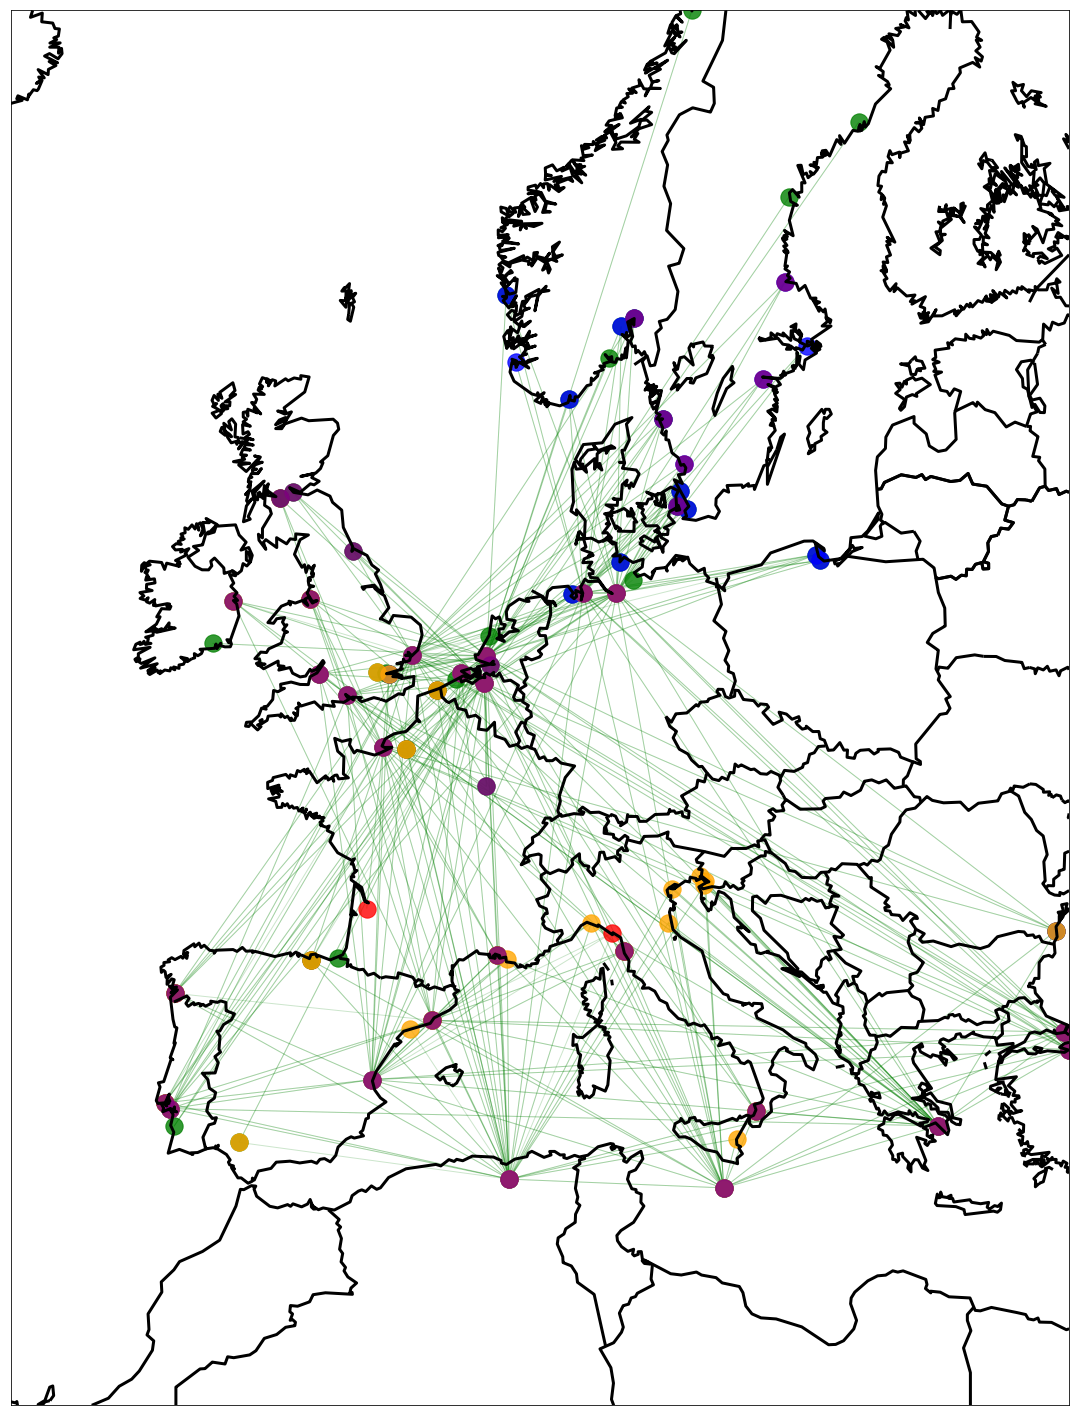

successful visualization


In [155]:
# Set up base map
plt.figure(figsize=(15,20))
m_sea = Basemap(
        projection='merc',
        llcrnrlon=-15.6671694,
        llcrnrlat=28.0336642,
        urcrnrlon=29.1799867634759,
        urcrnrlat=65.8376537,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

mx_sea, my_sea = m_sea(df_loc_community_sea['nodeLong'].values, df_loc_community_sea['nodeLat'].values)

pos = {}

for count, elem in enumerate (df_loc_community_sea['Label-Sea']):
    pos[elem] = (mx_sea[count], my_sea[count])

# Map the Rail Connections
# draw nodes and edges and overly on basemap
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph_sea_0, pos = pos, node_list = graph_sea_0.nodes(), node_color = 'red', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_0, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 0 done')

nx.draw_networkx_nodes(G = graph_sea_1, pos = pos, node_list = graph_sea_1.nodes(), node_color = 'green', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_1, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 1 done')

nx.draw_networkx_nodes(G = graph_sea_2, pos = pos, node_list = graph_sea_2.nodes(), node_color = 'blue', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_2, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 2 done')

nx.draw_networkx_nodes(G = graph_sea_3, pos = pos, node_list = graph_sea_3.nodes(), node_color = 'orange', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_3, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 3 done')

nx.draw_networkx_nodes(G = graph_sea_4, pos = pos, node_list = graph_sea_4.nodes(), node_color = 'purple', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_4, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 4 done')

m_sea.drawcountries(linewidth = 3)
m_sea.drawstates(linewidth = 0.2)
m_sea.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("map_sea_2017.png", format = "png", dpi = 300)
plt.show()
print ("successful visualization")

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


community 0 done
community 1 done
community 2 done


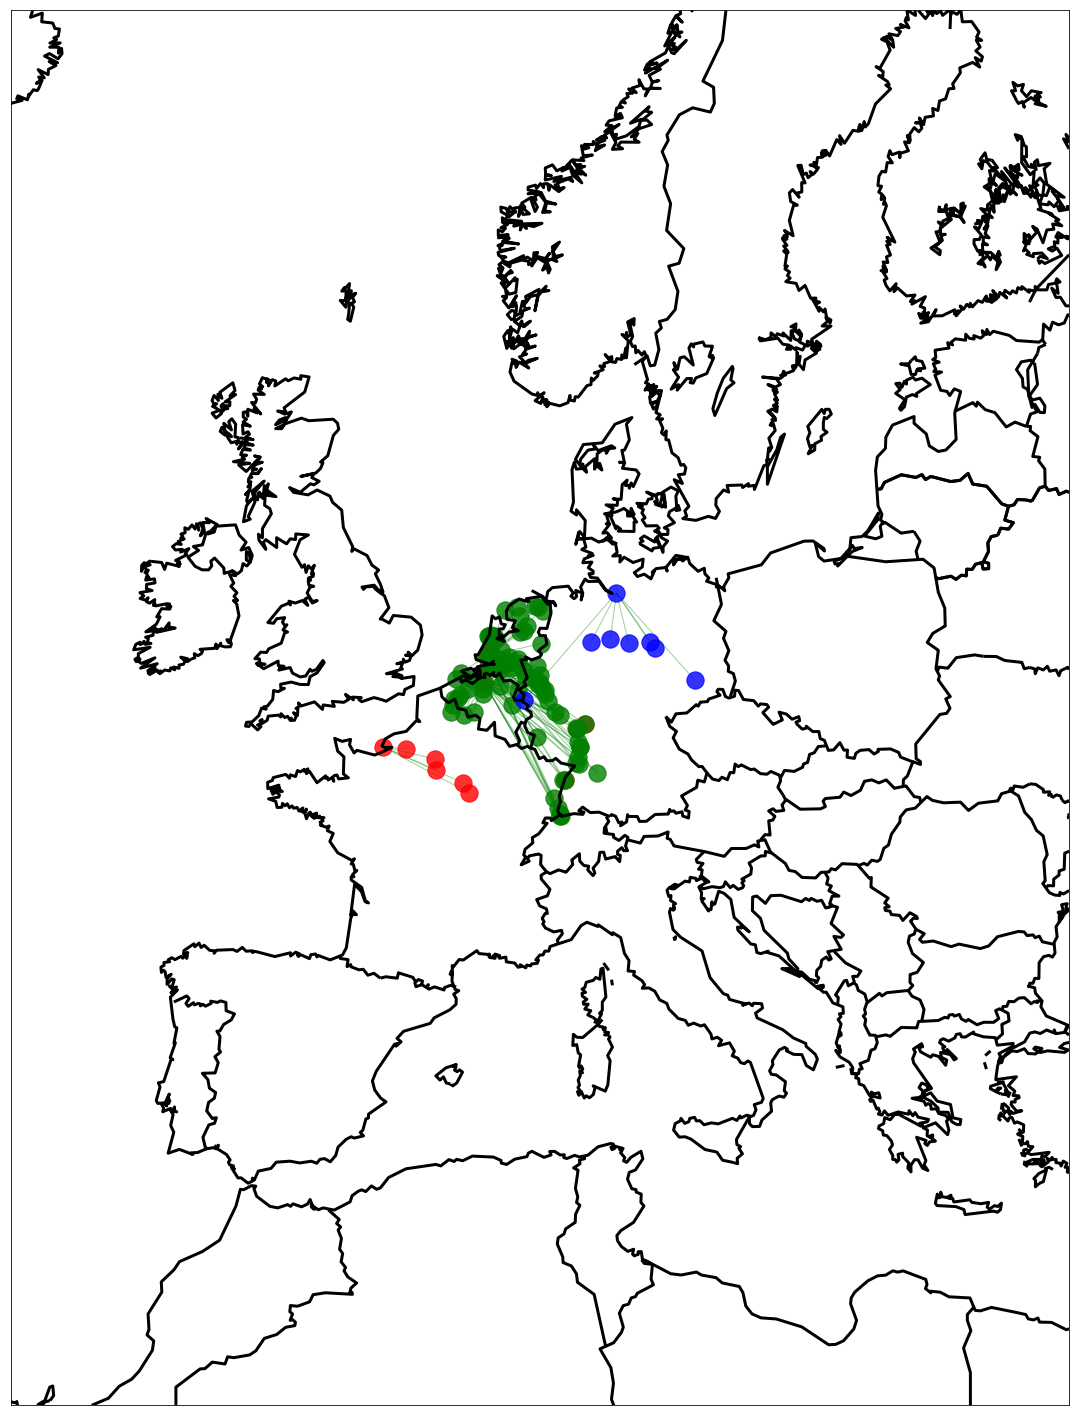

successful visualization


In [156]:
# Set up base map
plt.figure(figsize=(15,20))
m_inland = Basemap(
        projection='merc',
        llcrnrlon=-15.6671694,
        llcrnrlat=28.0336642,
        urcrnrlon=29.1799867634759,
        urcrnrlat=65.8376537,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

mx_inland, my_inland = m_inland(df_loc_community_inland['nodeLong'].values, df_loc_community_inland['nodeLat'].values)

pos = {}

for count, elem in enumerate (df_loc_community_inland['Label-Inland']):
    pos[elem] = (mx_inland[count], my_inland[count])
    
# Map the Rail Connections
# draw nodes and edges and overly on basemap
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph_inland_0, pos = pos, node_list = graph_inland_0.nodes(), node_color = 'red', alpha = 0.8)
nx.draw_networkx_edges(G = graph_inland_0, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 0 done')

nx.draw_networkx_nodes(G = graph_inland_1, pos = pos, node_list = graph_inland_1.nodes(), node_color = 'green', alpha = 0.8)
nx.draw_networkx_edges(G = graph_inland_1, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 1 done')

nx.draw_networkx_nodes(G = graph_inland_2, pos = pos, node_list = graph_inland_2.nodes(), node_color = 'blue', alpha = 0.8)
nx.draw_networkx_edges(G = graph_inland_2, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 2 done')

m_inland.drawcountries(linewidth = 3)
m_inland.drawstates(linewidth = 0.2)
m_inland.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("map_inland_2016.png", format = "png", dpi = 300)
plt.show()
print ("successful visualization")

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


community 0 done
community 1 done
community 2 done
community 3 done
community 4 done


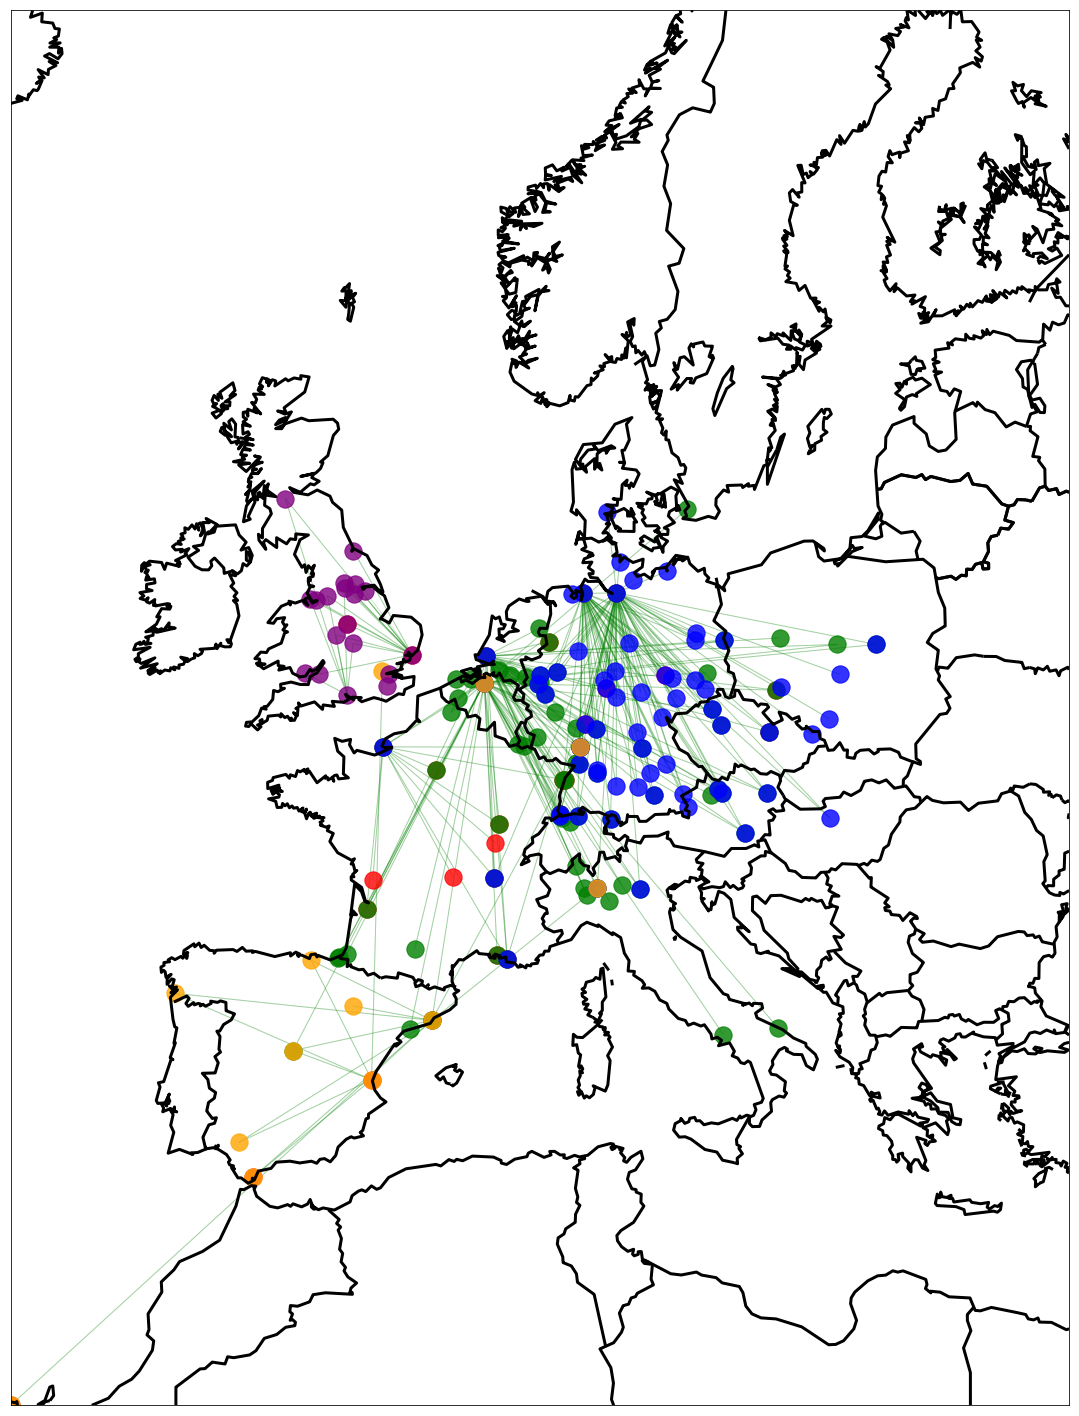

successful visualization


In [157]:
# Set up base map
plt.figure(figsize=(15,20))
m = Basemap(
        projection='merc',
        llcrnrlon=-15.6671694,
        llcrnrlat=28.0336642,
        urcrnrlon=29.1799867634759,
        urcrnrlat=65.8376537,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

mx, my = m(df_loc_community_rail['nodeLong'].values, df_loc_community_rail['nodeLat'].values)

pos = {}

for count, elem in enumerate (df_loc_community_rail['Label-Rail']):
    pos[elem] = (mx[count], my[count])
    
# Map the Rail Connections
# draw nodes and edges and overly on basemap
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph_rail_0, pos = pos, node_list = graph_rail_0.nodes(), node_color = 'red', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_0, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 0 done')

nx.draw_networkx_nodes(G = graph_rail_1, pos = pos, node_list = graph_rail_1.nodes(), node_color = 'green', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_1, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 1 done')

nx.draw_networkx_nodes(G = graph_rail_2, pos = pos, node_list = graph_rail_2.nodes(), node_color = 'blue', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_2, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 2 done')

nx.draw_networkx_nodes(G = graph_rail_3, pos = pos, node_list = graph_rail_3.nodes(), node_color = 'orange', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_3, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 3 done')

nx.draw_networkx_nodes(G = graph_rail_4, pos = pos, node_list = graph_rail_4.nodes(), node_color = 'purple', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_4, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 4 done')

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("map_rail.png", format = "png", dpi = 300)
plt.show()
print ("successful visualization")

In [158]:
# batasan

In [159]:
# Check perbedaan df spectral ama df_loc_community_rail - asal muasal dropna

# Matthew Effect

In [160]:
# Sea

In [161]:
df_centrality_sea = pd.read_csv("Centrality_Directed_Weighted_2017_09062019.csv", sep=';')
df_centrality_sea.rename({'Label':'Label-Sea'}, axis=1, inplace=True)
df_matthew_sea = pd.merge(df_community_sea, df_centrality_sea, on='Label-Sea')
df_matthew_sea = df_matthew_sea[df_matthew_sea['Layer_y']=='1-Multi']
df_matthew_sea.reset_index(drop=True, inplace=True)
df_matthew_sea_community_0 = df_matthew_sea[df_matthew_sea['Community-Sea']==0]
df_matthew_sea_community_1 = df_matthew_sea[df_matthew_sea['Community-Sea']==1]
df_matthew_sea_community_2 = df_matthew_sea[df_matthew_sea['Community-Sea']==2]
df_matthew_sea_community_3 = df_matthew_sea[df_matthew_sea['Community-Sea']==3]
df_matthew_sea_community_4 = df_matthew_sea[df_matthew_sea['Community-Sea']==4]

In [162]:
df_csv_matthew_sea = pd.DataFrame(columns=['Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Multiplexity', 'Kcore'], index=['Sea_community_0','Sea_community_1',
                                                                            'Sea_community_2','Sea_community_3','Sea_community_4'])

In [163]:
for i in range(len(df_csv_matthew_sea)):
    df_csv_matthew_sea.loc['Sea_community_0','Strength'] = df_matthew_sea_community_0.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_1','Strength'] = df_matthew_sea_community_1.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_2','Strength'] = df_matthew_sea_community_2.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_3','Strength'] = df_matthew_sea_community_3.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_4','Strength'] = df_matthew_sea_community_4.mean()['Strength']
     
    df_csv_matthew_sea.loc['Sea_community_0','StrengthIn'] = df_matthew_sea_community_0.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_1','StrengthIn'] = df_matthew_sea_community_1.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_2','StrengthIn'] = df_matthew_sea_community_2.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_3','StrengthIn'] = df_matthew_sea_community_3.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_4','StrengthIn'] = df_matthew_sea_community_4.mean()['StrengthIn']
    
    df_csv_matthew_sea.loc['Sea_community_0','StrengthOut'] = df_matthew_sea_community_0.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_1','StrengthOut'] = df_matthew_sea_community_1.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_2','StrengthOut'] = df_matthew_sea_community_2.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_3','StrengthOut'] = df_matthew_sea_community_3.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_4','StrengthOut'] = df_matthew_sea_community_4.mean()['StrengthOut']
    
    df_csv_matthew_sea.loc['Sea_community_0','Degree'] = df_matthew_sea_community_0.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_1','Degree'] = df_matthew_sea_community_1.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_2','Degree'] = df_matthew_sea_community_2.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_3','Degree'] = df_matthew_sea_community_3.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_4','Degree'] = df_matthew_sea_community_4.mean()['Degree']
    
    df_csv_matthew_sea.loc['Sea_community_0','DegreeIn'] = df_matthew_sea_community_0.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_1','DegreeIn'] = df_matthew_sea_community_1.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_2','DegreeIn'] = df_matthew_sea_community_2.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_3','DegreeIn'] = df_matthew_sea_community_3.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_4','DegreeIn'] = df_matthew_sea_community_4.mean()['DegreeIn']
    
    df_csv_matthew_sea.loc['Sea_community_0','DegreeOut'] = df_matthew_sea_community_0.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_1','DegreeOut'] = df_matthew_sea_community_1.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_2','DegreeOut'] = df_matthew_sea_community_2.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_3','DegreeOut'] = df_matthew_sea_community_3.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_4','DegreeOut'] = df_matthew_sea_community_4.mean()['DegreeOut']
    
    df_csv_matthew_sea.loc['Sea_community_0','PageRank'] = df_matthew_sea_community_0.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_1','PageRank'] = df_matthew_sea_community_1.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_2','PageRank'] = df_matthew_sea_community_2.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_3','PageRank'] = df_matthew_sea_community_3.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_4','PageRank'] = df_matthew_sea_community_4.mean()['PageRank']
    
    df_csv_matthew_sea.loc['Sea_community_0','Eigenvector'] = df_matthew_sea_community_0.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_1','Eigenvector'] = df_matthew_sea_community_1.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_2','Eigenvector'] = df_matthew_sea_community_2.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_3','Eigenvector'] = df_matthew_sea_community_3.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_4','Eigenvector'] = df_matthew_sea_community_4.mean()['Eigenvector']
    
    df_csv_matthew_sea.loc['Sea_community_0','Multiplexity'] = df_matthew_sea_community_0.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_1','Multiplexity'] = df_matthew_sea_community_1.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_2','Multiplexity'] = df_matthew_sea_community_2.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_3','Multiplexity'] = df_matthew_sea_community_3.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_4','Multiplexity'] = df_matthew_sea_community_4.mean()['Multiplexity']
    
    df_csv_matthew_sea.loc['Sea_community_0','Kcore'] = df_matthew_sea_community_0.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_1','Kcore'] = df_matthew_sea_community_1.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_2','Kcore'] = df_matthew_sea_community_2.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_3','Kcore'] = df_matthew_sea_community_3.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_4','Kcore'] = df_matthew_sea_community_4.mean()['Kcore']

In [164]:
df_csv_matthew_sea

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Multiplexity,Kcore
Sea_community_0,88,44,44,12.8,6.4,6.4,0.0387846,8.2557e-05,0.0666667,2.8
Sea_community_1,737.16,365.4,371.76,42.04,21,21.04,0.0860202,0.085104,0.493333,8.8
Sea_community_2,589.765,294.647,295.118,36.4118,18.2353,18.1765,0.0694169,0.00205979,0.470588,8.88235
Sea_community_3,201.435,101.696,99.7391,30.5652,15.2609,15.3043,0.0378218,0.000516286,0.434783,12.3043
Sea_community_4,401,207.8,193.2,42.6,21.4,21.2,0.0627898,0.00143928,0.6,14.4


In [165]:
df_csv_matthew_sea.to_csv("matthew_sea_2017.csv")

In [166]:
# Inland

In [167]:
df_centrality_inland = pd.read_csv("Centrality_Directed_Weighted_2017_09062019.csv", sep=';')
df_centrality_inland.rename({'Label':'Label-Inland'}, axis=1, inplace=True)
df_matthew_inland = pd.merge(df_community_inland, df_centrality_inland, on='Label-Inland')
df_matthew_inland = df_matthew_inland[df_matthew_inland['Layer_y']=='1-Multi']
df_matthew_inland.reset_index(drop=True, inplace=True)
df_matthew_inland_community_0 = df_matthew_inland[df_matthew_inland['Community-Inland']==0]
df_matthew_inland_community_1 = df_matthew_inland[df_matthew_inland['Community-Inland']==1]
df_matthew_inland_community_2 = df_matthew_inland[df_matthew_inland['Community-Inland']==2]

In [168]:
df_csv_matthew_inland = pd.DataFrame(columns=['Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Multiplexity', 'Kcore'], index=['Inland_community_0','Inland_community_1',
                                                                            'Inland_community_2'])

In [169]:
for i in range(len(df_csv_matthew_inland)):
    df_csv_matthew_inland.loc['Inland_community_0','Strength'] = df_matthew_inland_community_0.mean()['Strength']
    df_csv_matthew_inland.loc['Inland_community_1','Strength'] = df_matthew_inland_community_1.mean()['Strength']
    df_csv_matthew_inland.loc['Inland_community_2','Strength'] = df_matthew_inland_community_2.mean()['Strength']
     
    df_csv_matthew_inland.loc['Inland_community_0','StrengthIn'] = df_matthew_inland_community_0.mean()['StrengthIn']
    df_csv_matthew_inland.loc['Inland_community_1','StrengthIn'] = df_matthew_inland_community_1.mean()['StrengthIn']
    df_csv_matthew_inland.loc['Inland_community_2','StrengthIn'] = df_matthew_inland_community_2.mean()['StrengthIn']
    
    df_csv_matthew_inland.loc['Inland_community_0','StrengthOut'] = df_matthew_inland_community_0.mean()['StrengthOut']
    df_csv_matthew_inland.loc['Inland_community_1','StrengthOut'] = df_matthew_inland_community_1.mean()['StrengthOut']
    df_csv_matthew_inland.loc['Inland_community_2','StrengthOut'] = df_matthew_inland_community_2.mean()['StrengthOut']
    
    df_csv_matthew_inland.loc['Inland_community_0','Degree'] = df_matthew_inland_community_0.mean()['Degree']
    df_csv_matthew_inland.loc['Inland_community_1','Degree'] = df_matthew_inland_community_1.mean()['Degree']
    df_csv_matthew_inland.loc['Inland_community_2','Degree'] = df_matthew_inland_community_2.mean()['Degree']
    
    df_csv_matthew_inland.loc['Inland_community_0','DegreeIn'] = df_matthew_inland_community_0.mean()['DegreeIn']
    df_csv_matthew_inland.loc['Inland_community_1','DegreeIn'] = df_matthew_inland_community_1.mean()['DegreeIn']
    df_csv_matthew_inland.loc['Inland_community_2','DegreeIn'] = df_matthew_inland_community_2.mean()['DegreeIn']
    
    df_csv_matthew_inland.loc['Inland_community_0','DegreeOut'] = df_matthew_inland_community_0.mean()['DegreeOut']
    df_csv_matthew_inland.loc['Inland_community_1','DegreeOut'] = df_matthew_inland_community_1.mean()['DegreeOut']
    df_csv_matthew_inland.loc['Inland_community_2','DegreeOut'] = df_matthew_inland_community_2.mean()['DegreeOut']
    
    df_csv_matthew_inland.loc['Inland_community_0','PageRank'] = df_matthew_inland_community_0.mean()['PageRank']
    df_csv_matthew_inland.loc['Inland_community_1','PageRank'] = df_matthew_inland_community_1.mean()['PageRank']
    df_csv_matthew_inland.loc['Inland_community_2','PageRank'] = df_matthew_inland_community_2.mean()['PageRank']
    
    df_csv_matthew_inland.loc['Inland_community_0','Eigenvector'] = df_matthew_inland_community_0.mean()['Eigenvector']
    df_csv_matthew_inland.loc['Inland_community_1','Eigenvector'] = df_matthew_inland_community_1.mean()['Eigenvector']
    df_csv_matthew_inland.loc['Inland_community_2','Eigenvector'] = df_matthew_inland_community_2.mean()['Eigenvector']
    
    df_csv_matthew_inland.loc['Inland_community_0','Multiplexity'] = df_matthew_inland_community_0.mean()['Multiplexity']
    df_csv_matthew_inland.loc['Inland_community_1','Multiplexity'] = df_matthew_inland_community_1.mean()['Multiplexity']
    df_csv_matthew_inland.loc['Inland_community_2','Multiplexity'] = df_matthew_inland_community_2.mean()['Multiplexity']
    
    df_csv_matthew_inland.loc['Inland_community_0','Kcore'] = df_matthew_inland_community_0.mean()['Kcore']
    df_csv_matthew_inland.loc['Inland_community_1','Kcore'] = df_matthew_inland_community_1.mean()['Kcore']
    df_csv_matthew_inland.loc['Inland_community_2','Kcore'] = df_matthew_inland_community_2.mean()['Kcore']

In [170]:
df_csv_matthew_inland

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Multiplexity,Kcore
Inland_community_0,85.8462,42.9231,42.9231,12.6154,6.30769,6.30769,0.0398928,2.31036e-05,0.0512821,2.61538
Inland_community_1,411.26,204.589,206.671,24.9315,12.4658,12.4658,0.0497737,0.0947896,0.465753,6.23288
Inland_community_2,781.75,387.75,394,39,19.5,19.5,0.0916324,0.00262682,0.5,6.5


In [171]:
df_csv_matthew_inland.to_csv("matthew_inland_2017.csv")

In [172]:
# Rail

In [173]:
df_centrality_rail = pd.read_csv("Centrality_Directed_Weighted_2017_09062019.csv", sep=';')
df_centrality_rail.rename({'Label':'Label-Rail'}, axis=1, inplace=True)
df_matthew_rail = pd.merge(df_community_rail, df_centrality_rail, on='Label-Rail')
df_matthew_rail = df_matthew_rail[df_matthew_rail['Layer_y']=='1-Multi']
df_matthew_rail.reset_index(drop=True, inplace=True)
df_matthew_rail_community_0 = df_matthew_rail[df_matthew_rail['Community-Rail']==0]
df_matthew_rail_community_1 = df_matthew_rail[df_matthew_rail['Community-Rail']==1]
df_matthew_rail_community_2 = df_matthew_rail[df_matthew_rail['Community-Rail']==2]
df_matthew_rail_community_3 = df_matthew_rail[df_matthew_rail['Community-Rail']==3]
df_matthew_rail_community_4 = df_matthew_rail[df_matthew_rail['Community-Rail']==4]

In [174]:
df_csv_matthew_rail = pd.DataFrame(columns=['Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Multiplexity', 'Kcore'], index=['Rail_community_0','Rail_community_1',
                                                                            'Rail_community_2','Rail_community_3','Rail_community_4'])

In [175]:
for i in range(len(df_csv_matthew_rail)):
    df_csv_matthew_rail.loc['Rail_community_0','Strength'] = df_matthew_rail_community_0.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_1','Strength'] = df_matthew_rail_community_1.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_2','Strength'] = df_matthew_rail_community_2.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_3','Strength'] = df_matthew_rail_community_3.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_4','Strength'] = df_matthew_rail_community_4.mean()['Strength']
     
    df_csv_matthew_rail.loc['Rail_community_0','StrengthIn'] = df_matthew_rail_community_0.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_1','StrengthIn'] = df_matthew_rail_community_1.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_2','StrengthIn'] = df_matthew_rail_community_2.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_3','StrengthIn'] = df_matthew_rail_community_3.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_4','StrengthIn'] = df_matthew_rail_community_4.mean()['StrengthIn']
    
    df_csv_matthew_rail.loc['Rail_community_0','StrengthOut'] = df_matthew_rail_community_0.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_1','StrengthOut'] = df_matthew_rail_community_1.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_2','StrengthOut'] = df_matthew_rail_community_2.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_3','StrengthOut'] = df_matthew_rail_community_3.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_4','StrengthOut'] = df_matthew_rail_community_4.mean()['StrengthOut']
    
    df_csv_matthew_rail.loc['Rail_community_0','Degree'] = df_matthew_rail_community_0.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_1','Degree'] = df_matthew_rail_community_1.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_2','Degree'] = df_matthew_rail_community_2.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_3','Degree'] = df_matthew_rail_community_3.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_4','Degree'] = df_matthew_rail_community_4.mean()['Degree']
    
    df_csv_matthew_rail.loc['Rail_community_0','DegreeIn'] = df_matthew_rail_community_0.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_1','DegreeIn'] = df_matthew_rail_community_1.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_2','DegreeIn'] = df_matthew_rail_community_2.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_3','DegreeIn'] = df_matthew_rail_community_3.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_4','DegreeIn'] = df_matthew_rail_community_4.mean()['DegreeIn']
    
    df_csv_matthew_rail.loc['Rail_community_0','DegreeOut'] = df_matthew_rail_community_0.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_1','DegreeOut'] = df_matthew_rail_community_1.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_2','DegreeOut'] = df_matthew_rail_community_2.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_3','DegreeOut'] = df_matthew_rail_community_3.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_4','DegreeOut'] = df_matthew_rail_community_4.mean()['DegreeOut']
    
    df_csv_matthew_rail.loc['Rail_community_0','PageRank'] = df_matthew_rail_community_0.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_1','PageRank'] = df_matthew_rail_community_1.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_2','PageRank'] = df_matthew_rail_community_2.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_3','PageRank'] = df_matthew_rail_community_3.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_4','PageRank'] = df_matthew_rail_community_4.mean()['PageRank']
    
    df_csv_matthew_rail.loc['Rail_community_0','Eigenvector'] = df_matthew_rail_community_0.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_1','Eigenvector'] = df_matthew_rail_community_1.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_2','Eigenvector'] = df_matthew_rail_community_2.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_3','Eigenvector'] = df_matthew_rail_community_3.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_4','Eigenvector'] = df_matthew_rail_community_4.mean()['Eigenvector']
    
    df_csv_matthew_rail.loc['Rail_community_0','Multiplexity'] = df_matthew_rail_community_0.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_1','Multiplexity'] = df_matthew_rail_community_1.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_2','Multiplexity'] = df_matthew_rail_community_2.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_3','Multiplexity'] = df_matthew_rail_community_3.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_4','Multiplexity'] = df_matthew_rail_community_4.mean()['Multiplexity']
    
    df_csv_matthew_rail.loc['Rail_community_0','Kcore'] = df_matthew_rail_community_0.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_1','Kcore'] = df_matthew_rail_community_1.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_2','Kcore'] = df_matthew_rail_community_2.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_3','Kcore'] = df_matthew_rail_community_3.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_4','Kcore'] = df_matthew_rail_community_4.mean()['Kcore']

In [176]:
df_csv_matthew_rail

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Multiplexity,Kcore
Rail_community_0,84,42,42,12,6,6,0.0416168,0,0,2
Rail_community_1,480.382,239.891,240.491,27.9455,13.9636,13.9818,0.0573903,0.0684081,0.515152,6.32727
Rail_community_2,392,196.244,195.756,23.6,11.8222,11.7778,0.0466956,0.00237117,0.392593,6.93333
Rail_community_3,228.625,113.875,114.75,30.25,15,15.25,0.0414157,0.000508365,0.541667,10
Rail_community_4,220.722,109.833,110.889,23.3889,11.6667,11.7222,0.0409749,0.000539605,0.444444,8.11111


In [177]:
df_csv_matthew_rail.to_csv("matthew_rail_2017.csv")

# Matthew Effect Per Hub

In [178]:
df_matthew_hub_sea = df_centrality_sea[(df_centrality_sea['Label-Sea'] == 'Rotterdam') | (df_centrality_sea['Label-Sea'] == 'Antwerp') | (df_centrality_sea['Label-Sea'] == 'Hamburg')|
              (df_centrality_sea['Label-Sea'] == 'Bremerhaven') | (df_centrality_sea['Label-Sea'] == 'Valencia') | (df_centrality_sea['Label-Sea'] == 'Piraeus')|
              (df_centrality_sea['Label-Sea'] == 'Algeciras') | (df_centrality_sea['Label-Sea'] == 'Felixstowe') | (df_centrality_sea['Label-Sea'] == 'Barcelona')|
              (df_centrality_sea['Label-Sea'] == 'Marsaxlokk') | (df_centrality_sea['Label-Sea'] == 'Le_Havre') | (df_centrality_sea['Label-Sea'] == 'Southampton')]

df_matthew_hub_sea = df_matthew_hub_sea[df_matthew_hub_sea['Layer']=='1-Multi']
df_matthew_hub_sea.reset_index(drop=True, inplace=True)

df_matthew_hub_inland = df_centrality_inland[(df_centrality_inland['Label-Inland'] == 'Rotterdam') | (df_centrality_inland['Label-Inland'] == 'Antwerp') | (df_centrality_inland['Label-Inland'] == 'Hamburg')|
              (df_centrality_inland['Label-Inland'] == 'Bremerhaven') | (df_centrality_inland['Label-Inland'] == 'Valencia') | (df_centrality_inland['Label-Inland'] == 'Piraeus')|
              (df_centrality_inland['Label-Inland'] == 'Algeciras') | (df_centrality_inland['Label-Inland'] == 'Felixstowe') | (df_centrality_inland['Label-Inland'] == 'Barcelona')|
              (df_centrality_inland['Label-Inland'] == 'Marsaxlokk') | (df_centrality_inland['Label-Inland'] == 'Le_Havre') | (df_centrality_inland['Label-Inland'] == 'Southampton')]

df_matthew_hub_inland = df_matthew_hub_inland[df_matthew_hub_inland['Layer']=='1-Multi']
df_matthew_hub_inland.reset_index(drop=True, inplace=True)

df_matthew_hub_rail = df_centrality_rail[(df_centrality_rail['Label-Rail'] == 'Rotterdam') | (df_centrality_rail['Label-Rail'] == 'Antwerp') | (df_centrality_rail['Label-Rail'] == 'Hamburg')|
              (df_centrality_rail['Label-Rail'] == 'Bremerhaven') | (df_centrality_rail['Label-Rail'] == 'Valencia') | (df_centrality_rail['Label-Rail'] == 'Piraeus')|
              (df_centrality_rail['Label-Rail'] == 'Algeciras') | (df_centrality_rail['Label-Rail'] == 'Felixstowe') | (df_centrality_rail['Label-Rail'] == 'Barcelona')|
              (df_centrality_rail['Label-Rail'] == 'Marsaxlokk') | (df_centrality_rail['Label-Rail'] == 'Le_Havre') | (df_centrality_rail['Label-Rail'] == 'Southampton')]

df_matthew_hub_rail = df_matthew_hub_rail[df_matthew_hub_rail['Layer']=='1-Multi']
df_matthew_hub_rail.reset_index(drop=True, inplace=True)

df_matthew_hub_sea.to_csv("matthew_hub_sea_2017.csv")
df_matthew_hub_inland.to_csv("matthew_hub_inland_2017.csv")
df_matthew_hub_rail.to_csv("matthew_hub_rail_2017.csv")